In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = sns.load_dataset('titanic')

In [4]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_features].corr()

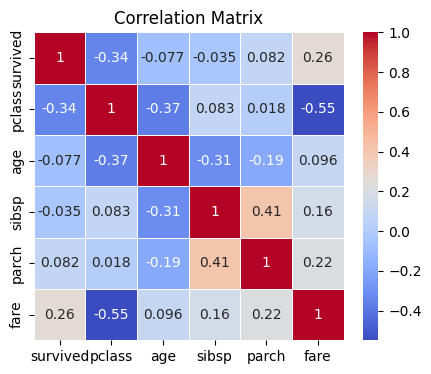

In [7]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
X = df.drop(columns=['survived', 'embarked', 'sex', 'deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'])
y = df['survived']

In [9]:
df_clean = X.join(y).dropna()
X_clean = df_clean.drop(columns=['survived'])
y_clean = df_clean['survived']

In [10]:
mi = mutual_info_classif(X_clean, y_clean)
mi_scores = pd.Series(mi, index=X_clean.columns).sort_values(ascending=False)

C:\Users\SHAHEER AHMED\AppData\Local\Temp\ipykernel_2628\1747639319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores, y=mi_scores.index, palette='viridis')


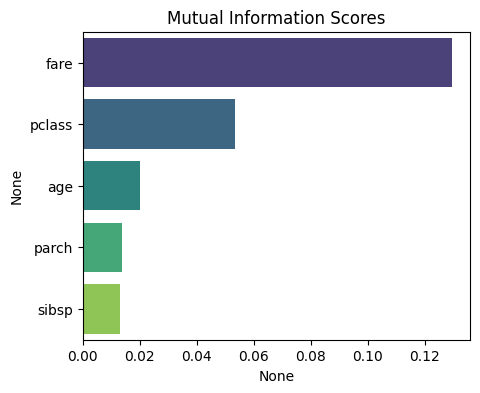

In [12]:
plt.figure(figsize=(5, 4))
sns.barplot(x=mi_scores, y=mi_scores.index, palette='viridis')
plt.title('Mutual Information Scores')
plt.show()

In [13]:
X = df.drop(columns=['survived', 'embarked', 'sex', 'deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'])
y = df['survived']

In [14]:
df_clean = X.join(y).dropna()
X_clean = df_clean.drop(columns=['survived'])
y_clean = df_clean['survived']

In [15]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns)

In [16]:
power = PowerTransformer()
X_power = pd.DataFrame(power.fit_transform(X_clean), columns=X_clean.columns)

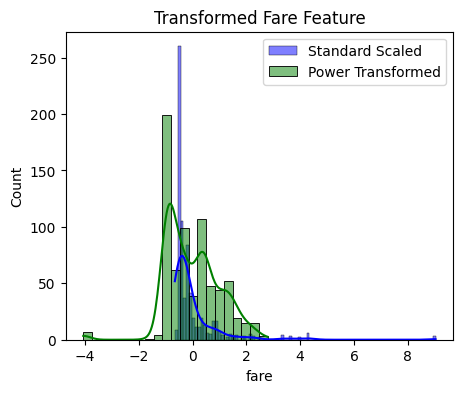

In [18]:
plt.figure(figsize=(5, 4))
sns.histplot(X_scaled['fare'], kde=True, color='blue', label='Standard Scaled')
sns.histplot(X_power['fare'], kde=True, color='green', label='Power Transformed')
plt.title('Transformed Fare Feature')
plt.legend()
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy with Standard Scaling: {accuracy_score(y_test, y_pred):.2f}')


Accuracy with Standard Scaling: 0.65


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_power, y_clean, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Accuracy with Power Transformation: {accuracy_score(y_test, y_pred):.2f}')

Accuracy with Power Transformation: 0.64


In [23]:
df['FamilySize'] = df['sibsp'] + df['parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

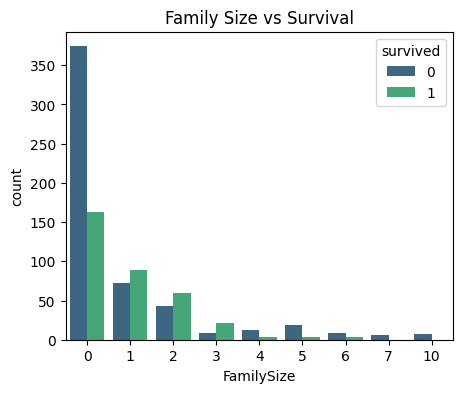

In [25]:
plt.figure(figsize=(5, 4))
sns.countplot(x='FamilySize', hue='survived', data=df, palette='viridis')
plt.title('Family Size vs Survival')
plt.show()

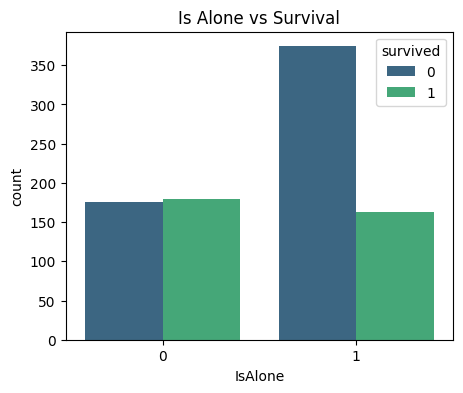

In [27]:
plt.figure(figsize=(5, 4))
sns.countplot(x='IsAlone', hue='survived', data=df, palette='viridis')
plt.title('Is Alone vs Survival')
plt.show()